In [1]:
import numpy as np

lam = 180
pClass1 = [[1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1]]
pClass2 = [[1, 0, 0, 0, 0], [0, 0.8, 0.2, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0]]
pClass3 = [[1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0.5, 0.5, 0, 0]]
pClass4 = [[1, 0, 0, 0, 0], [0, 0.4, 0.6, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
p = [pClass1, pClass2, pClass3, pClass4]
p

[[[1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1]],
 [[1, 0, 0, 0, 0],
  [0, 0.8, 0.2, 0, 0],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 0, 1],
  [0, 0.5, 0.5, 0, 0]],
 [[1, 0, 0, 0, 0],
  [0, 0.4, 0.6, 0, 0],
  [0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1]]]

In [2]:
lambdas0 = []
for r in range(4):
    lambdas0
    for i in range(5):
        lambdas0.append(lam*p[r][0][i])
lambdas0

[180, 0, 0, 0, 0, 180, 0, 0, 0, 0, 180, 0, 0, 0, 0, 180, 0, 0, 0, 0]

In [3]:
lambda_ir = np.zeros([5,4])
lambda_ir[0,0] = lam
lambda_ir[0,1] = lam
lambda_ir[0,2] = lam
lambda_ir[0,3] = lam
#
lambda_ir[1,0] = 0
lambda_ir[1,1] = lam * 0.8
lambda_ir[1,2] = lam * 0.5
lambda_ir[1,3] = lam * 0.4
#
lambda_ir[2,0] = 0
lambda_ir[2,1] = lam * 0.2
lambda_ir[2,2] = lam * 0.5
lambda_ir[2,3] = lam * 0.6
#
lambda_ir[3,0] = lam
lambda_ir[3,1] = 0
lambda_ir[3,2] = lam
lambda_ir[3,3] = 0.4 * lam + 0.6 * lam
#
lambda_ir[4,0] = lam
lambda_ir[4,1] = lam
lambda_ir[4,2] = lam
lambda_ir[4,3] = lam

In [4]:
lambda_ir

array([[180., 180., 180., 180.],
       [  0., 144.,  90.,  72.],
       [  0.,  36.,  90., 108.],
       [180.,   0., 180., 180.],
       [180., 180., 180., 180.]])

In [6]:
m_i = [1, 1, 1, 4, 1]
mi_ir = np.zeros([5,4])
mi_ir[0,:] = np.array([250, 250, 250, 250])
mi_ir[1,:] = np.array([0, 150, 150, 150])
mi_ir[2,:] = np.array([0, 120, 120, 120])
mi_ir[3,:] = np.array([95, 0, 95, 95])
mi_ir[4,:] = np.array([200, 200, 200, 200])
mi_ir

array([[250., 250., 250., 250.],
       [  0., 150., 150., 150.],
       [  0., 120., 120., 120.],
       [ 95.,   0.,  95.,  95.],
       [200., 200., 200., 200.]])

In [7]:
ro_ir = np.zeros([5, 4])
for i in range(5):
    for r in range(4):
        ro_ir[i,r] = lambda_ir[i,r] / (m_i[i] * mi_ir[i,r])
ro_ir = np.nan_to_num(ro_ir)
np.set_printoptions(precision = 3)
ro_ir

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


array([[0.72 , 0.72 , 0.72 , 0.72 ],
       [0.   , 0.96 , 0.6  , 0.48 ],
       [0.   , 0.3  , 0.75 , 0.9  ],
       [0.474, 0.   , 0.474, 0.474],
       [0.9  , 0.9  , 0.9  , 0.9  ]])

In [8]:
# ro_ir = [[0.2, 0.2, 0.2, 0.2], [0.2, 0.2, 0.2, 0.2], [0.2, 0.2, 0.2, 0.2],
#         [0.2, 0.2, 0.2, 0.2], [0.2, 0.2, 0.2, 0.2]]
# ro_ir

In [9]:
def calculate_pi_k_i(ro_i, k_i, m_i):
    if m_i == 1:
        return (1 - ro_i)*ro_i**k_i
    else:
        sum_ = 0
        for i in range(m_i):
            sum_ += (m_i*ro_i)**i/np.math.factorial(i)
        sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
        if k_i <= m_i:
            return 1/sum_*(m_i*ro_i)**k_i/np.math.factorial(k_i)
        else:
            return 1/sum_*m_i**m_i*ro_i**k_i/np.math.factorial(m_i)

In [10]:
def calculate_pi_k(pi_i):
    result = 1
    for pi in pi_i:
        result *= pi
    return result

In [11]:
def calculate_ro_i(i):
    return np.sum(lambda_ir[i])/(np.sum(mi_ir[i])*m_i[i])

In [12]:
probs = []
for i in range(5):
    probs_i = []
    for k in range(10):
        probs_i.append(calculate_pi_k_i(calculate_ro_i(i), k, m_i[i]))
    probs.append(probs_i)
probs

[[0.28,
  0.2016,
  0.145152,
  0.10450944,
  0.0752467968,
  0.054177693696,
  0.039007939461119995,
  0.028085716412006394,
  0.020221715816644604,
  0.014559635387984113],
 [0.31999999999999995,
  0.2176,
  0.14796800000000002,
  0.10061824,
  0.06842040320000001,
  0.04652587417600001,
  0.031637594439680006,
  0.021513564218982408,
  0.014629223668908039,
  0.009947872094857467],
 [0.35,
  0.22749999999999998,
  0.147875,
  0.09611875,
  0.06247718750000001,
  0.040610171875000003,
  0.026396611718750004,
  0.017157797617187505,
  0.011152568451171877,
  0.00724916949326172],
 [0.14611835181737232,
  0.2768558244960738,
  0.26228446531206995,
  0.16565334651288627,
  0.07846737466399875,
  0.03716875641978888,
  0.01760625304095263,
  0.008339804072030192,
  0.0039504335078037744,
  0.0018712579773807355],
 [0.09999999999999998,
  0.08999999999999998,
  0.08099999999999999,
  0.07289999999999999,
  0.06560999999999999,
  0.059049,
  0.05314409999999999,
  0.047829689999999994,
  0

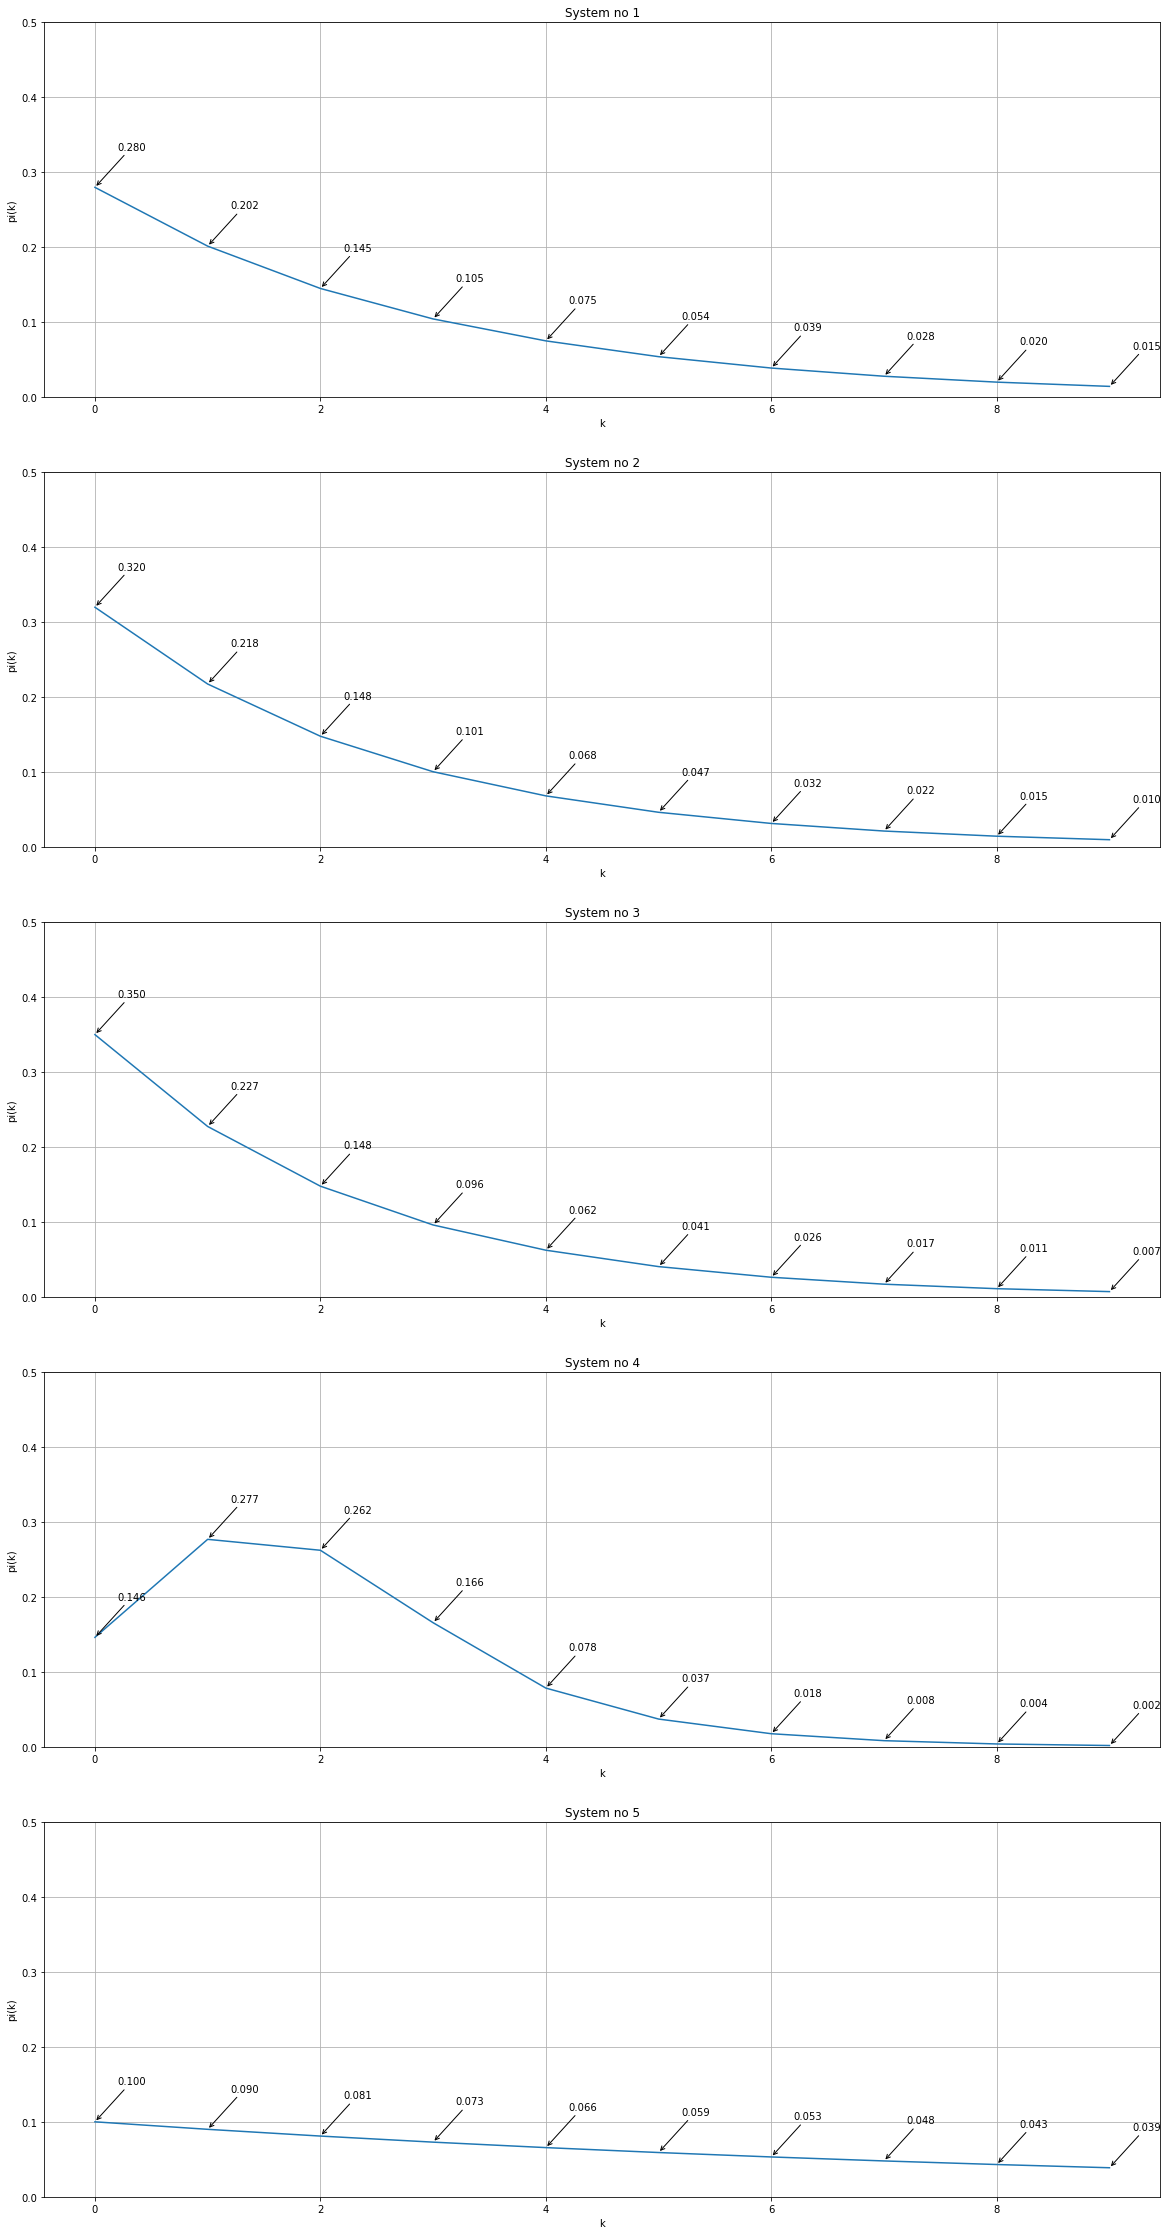

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize = [20, 40])
for i in range(len(axs.reshape(-1))):
    axs[i].plot(probs[i])
    axs[i].grid()
    axs[i].set_ylim([0, 0.5])
    axs[i].set_title('System no {}'.format(i + 1))
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('pi(k)')
    for j in range(len(probs[i])):
        axs[i].annotate('{0:.3f}'.format(probs[i][j]), (j, probs[i][j]), xytext = (j + 0.2, probs[i][j] + 0.05), 
                        arrowprops = {'arrowstyle': '->'})

In [14]:
def calculate_K_ir(ro_ir, ro_i, m_i):
    sum_ = 0
    for k_i in range(m_i):
        sum_ += (m_i*ro_i)**k_i/np.math.factorial(k_i)
    sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result = m_i*ro_ir + ro_ir/(1 - ro_i)*(m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result *= 1/sum_
    return result                                                       

In [15]:
Ks = np.zeros((5, 4))
for i in range(5):
    for r in range(4):
        Ks[i][r] = calculate_K_ir(ro_ir[i, r], calculate_ro_i(i), m_i[i])
Ks

array([[2.053, 2.053, 2.053, 2.053],
       [0.   , 2.347, 1.467, 1.174],
       [0.   , 0.662, 1.655, 1.986],
       [0.411, 0.   , 0.411, 0.411],
       [8.19 , 8.19 , 8.19 , 8.19 ]])

In [16]:
def calculate_Q_ir(ro_ir, ro_i, m_i):
    sum_ = 0
    for k_i in range(m_i):
        sum_ += (m_i*ro_i)**k_i/np.math.factorial(k_i)
    sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result = ro_ir/(1 - ro_i)*(m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result *= 1/sum_
    return result 

In [18]:
Qs = np.zeros((5,4))
for i in range(5):
    for r in range(4):
        Qs[i][r] = calculate_Q_ir(ro_ir[i, r], calculate_ro_i(i), m_i[i])
Qs

array([[1.851, 1.851, 1.851, 1.851],
       [0.   , 2.04 , 1.275, 1.02 ],
       [0.   , 0.557, 1.393, 1.671],
       [0.134, 0.   , 0.134, 0.134],
       [8.1  , 8.1  , 8.1  , 8.1  ]])

In [29]:
def calculate_ro_ir(lambdas, ms, mis):
    ro_ir = np.zeros([5, 4])
    for i in range(5):
        for r in range(4):
            ro_ir[i,r] = lambdas[i,r] / (ms[i] * mis[i,r])
    ro_ir = np.nan_to_num(ro_ir)
    return ro_ir

In [ ]:
def calculate_ro_i(lambdas, ms, mis):
    ro_i = []
    for i in range(len(ms)):
        ro_i.append(np.sum(lambda_ir[i])/(np.sum(mis[i])*ms[i]))
    return ro_i

In [30]:
def calculate_Q(lambdas, ms, mis):
    ro_ir = calculate_ro_ir(lambdas, ms, mis)
    ro_i = calculate_ro_i(lambdas, ms, mis)
    Qs = np.zeros(ro_irs.shape)
    for i in range(Qs.shape[0]):
        for r in range(Qs.shape[1]):
            Qs[i][r] = calculate_Q_ir(ro_ir[i, r], ro_i(i), ms[i])
    return Qs

In [24]:
C_1ij = [[0.5, 0.5, 0.5, 0.5],
         [0,   0.8, 0.5, 0.4],
         [0,   0.4, 0.7, 0.5],
         [0.6, 0,   0.5, 0.6],
         [0.5, 0.5, 0.5, 0.5]]

C_1ij = np.array(C_1ij)
C_1ij

array([[0.5, 0.5, 0.5, 0.5],
       [0. , 0.8, 0.5, 0.4],
       [0. , 0.4, 0.7, 0.5],
       [0.6, 0. , 0.5, 0.6]])

In [26]:
C_2i = [0, 0.9, 0.7, 0.3, 0.2]

C_2i = np.array(C_2i)
C_2i

array([0. , 0.9, 0.7, 0.3, 0.2])

In [ ]:
def cost_fun(lambdas, ms, mis):
    Q = calculate_Q(lambdas, ms, mis)
    ro_i = calculate_ro_i(lambdas, ms, mis)
    m_nzi = ms - ro_i
    (row, col) = Q.shape
    result_part = np.zeros((1, row))
    for i in range(row):
        for j in range(col):
            result_part[1,i] += C_1ij[i,j] * Q[i,j]
        result_part[1,i] += C_2i[i] * m_nzi[i]
    return np.sum(result_part)
        